In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.core.fromnumeric import shape
kernal=np.ones((2,2))

In [13]:
pic='1.jpg'
plt.rcParams['figure.figsize']=(10,10)

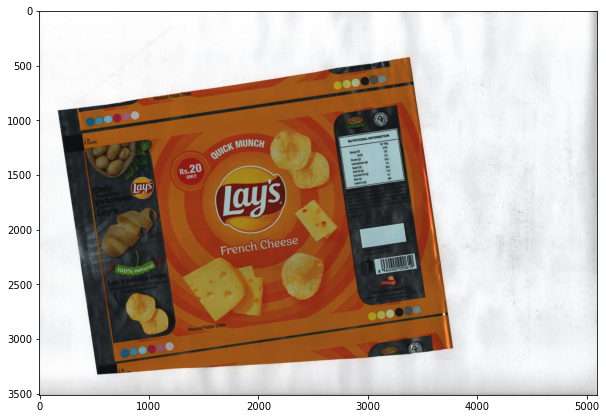

In [14]:
img=cv2.imread(pic)
# img=img[80:420:,190:380]
plt.imshow(img[:,:,::-1])

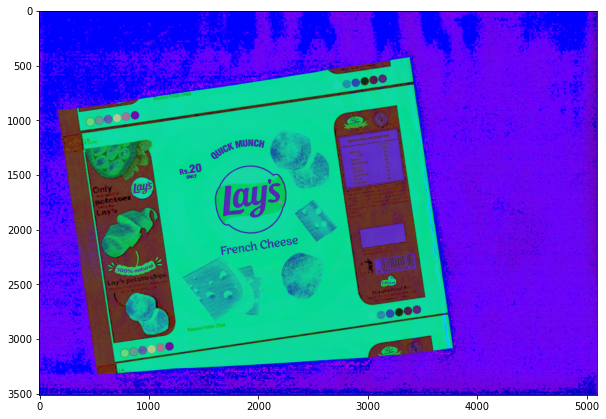

In [15]:
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

In [16]:
import ipywidgets.widgets as widgets
h=widgets.IntRangeSlider(
    value=[0, 180],
    min=0,
    max=255,
    step=1,
    description='HUE:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    
)
s=widgets.IntRangeSlider(
    value=[0, 255],
    min=0,
    max=255,
    step=1,
    description='Seturation:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    
)

v=widgets.IntRangeSlider(
#     value=[0, 25],
    value=[0, 27],
    min=0,
    max=255,
    step=1,
    description='Brightness:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    
)


# Area=widgets.IntRangeSlider(
#     value=[0, 40],
#     min=0,
#     max=1000,
#     step=1,
#     description='Area:',
#     disabled=False,
#     continuous_update=False,
#     orientation='horizontal',
#     readout=True,
#     readout_format='d',
    
# )


In [21]:
a=[]
# widgets.interact(mask,h=h,s=s,v=v)
def mask(h=(0,255),s=(0,255),v=(0,200)):
    img=cv2.imread(pic)
    global mask_image
    global a
    mask_image=cv2.inRange(hsv,np.array((h[0],s[0],v[0])),np.array((h[1],s[1],v[1])))
    plt.imshow(mask_image,cmap='gray')
#     plt.imshow(cv2.cvtColor(mask_image,cv2.COLOR_BGR2RGB))
    contour,hierarchy=cv2.findContours(mask_image,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
    contour=sorted(contour,key=lambda x:cv2.contourArea(x),reverse=True)
#     cv2.drawContours(img, cnt, -1, (0, 255, 0), 10)
    print(len(contour))
#     a=[]
# print(len(contour))
    for cnt in contour:
#     print(len(cnt))
#     print(cv2.boundingRect(contour[0]))
#     (x,y,w,h)=cv2.boundingRect(cnt)
#     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        area=cv2.contourArea(cnt)
        if area>350:
#         if (area>Area[0]) & (area<Area[1]):
#         print(area)
            a.append(cnt)
            cv2.drawContours(img, cnt, -1, (0, 255, 0), 10)
    plt.imshow(img[:,:,::-1])
#     return mask_image
#     cv2.imwrite('mask.png',cv2.cvtColor(mask_image,cv2.COLOR_BGR2RGB))

In [22]:
widgets.interact(mask,h=h,s=s,v=v)

interactive(children=(IntRangeSlider(value=(0, 255), continuous_update=False, description='HUE:', max=255), In…

<function __main__.mask(h=(0, 255), s=(0, 255), v=(0, 200))>

In [30]:
# import os
# os.environ["OPENCV_VIDEOIO_MSMF_ENABLE_HW_TRANSFORMS"] = '0'
# import cvzone
# import cv2
# print('start')
# cap=cv2.VideoCapture(1)
# print('finish')
# # cap.set(cv2.CV_CAP_PROP_FRAME_WIDTH, 1280)
# cap.set(cv2.CAP_PROP_FPS,60)
# fpsReader=cvzone.FPS()
# while True:
#     _,img=cap.read()
#     # fps,img=fpsReader.update(img)
#     cv2.imshow('window',img)
#     if cv2.waitKey(1) & 0xff==ord('q'):
#         break

# import cv2
# import cvzone
# import numpy as np
# from numpy.core.fromnumeric import shape, size
# from numpy.lib.type_check import imag
# kernel=np.ones((5,5),np.uint8)
# img1=cv2.imread('4.jpeg')
# # img1=np.array(img1)
# cv2.imshow('mor',img1)
# # print(shape(img1))
# cv2.waitKey(0)
import cv2
import numpy as np
from numpy.core.fromnumeric import shape
from numpy.lib.type_check import imag
kernel=np.ones((5,5),np.uint8)

# cap=cv2.VideoCapture(1)
while True:
    img1=cv2.imread('1.jpg')
    img1=cv2.resize(img1,(300,400))
    img2=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    thresh,img=cv2.threshold(img2,170,255,cv2.THRESH_BINARY)
#     dilation=cv2.dilate(img,kernel,iterations=3)
#     dilation=cv2.erode(dilation,kernel,iterations=3)
#     mor=cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
#     mor=cv2.morphologyEx(mor,cv2.MORPH_CLOSE,kernel)
#     img=np.array(img)
#     print(shape(img))
#     imgblack=np.zeros(shape(img))
#     for i in range(np.shape(img)[0]):
#         for j in range(np.shape(img)[1]):
#             if img[i][j]==0:
#                 
#                 imgblack[i][j]=255
#             elif img[i][j]==255:
#                 imgblack[i][j]=0
#     print(img[0][1])    
#     cv2.imshow('Dilation',dilation)
    cv2.imshow('1',img)
#     cv2.imshow('orginal',img1)
#     cv2.imshow('gray',img2)
#     cv2.imshow('mor',mor)
     
    
    
    
    
    if  cv2.waitKey(1) & 0xff==ord('q'):
        break
cv2.destroyAllWindows()